# __YÜKSEK DAYANIMLI BETON__

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 999)
pd.set_option("display.float_format", "{:.3f}".format)
sns.set()

In [4]:
cc = pd.read_csv('concrete_clean.csv')

In [5]:
cc.head(3)

,Cement,Slag,FlyAsh,Water,SPs,CoarseAgg,FineAgg,WC,Day,Strength
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,0.300,28,79.986
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,0.300,28,61.887
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,0.686,90,40.270


In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, accuracy_score
import lightgbm as lgb

In [6]:
Y = cc['Strength']
X = cc.drop(['Strength'], axis=1)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

standardscaler = StandardScaler()
x_train = standardscaler.fit_transform(x_train)
x_test = standardscaler.transform(x_test)

In [12]:
d_train = lgb.Dataset(x_train, label = y_train)
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmsle',
    'max_depth': 6, 
    'learning_rate': 0.1,
    'verbose': 0}

In [39]:
lgb_model = lgb.train(params, d_train, num_boost_round = 1100)
y_pred = lgb_model.predict(x_test)
y_pred_train = lgb_model.predict(x_train)

np.sqrt(mean_squared_error(y_test, y_pred))

4.1915932829718185

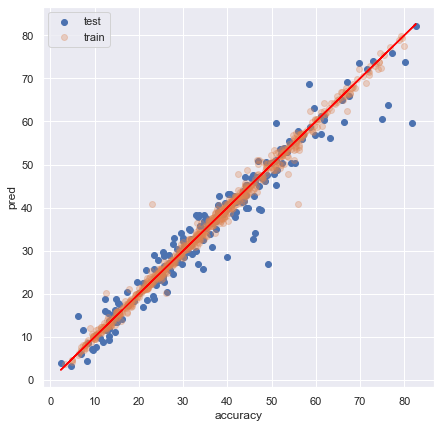

In [40]:
plt.figure(figsize=(7, 7))
ax1 = plt.scatter(y_test, y_pred)
ax2 = plt.scatter(y_train, y_pred_train, alpha = 0.30)
ax3 = plt.plot(y_test, y_test, color = 'red')
plt.legend((ax1, ax2), ('test', 'train'))
plt.xlabel('accuracy')
plt.ylabel('pred')
plt.show()

In [37]:
k_range = np.arange(700, 2000, 100)
test_rmse = np.empty(len(k_range))

for i, k in enumerate(k_range):
    lgb_model = lgb.train(params, d_train, num_boost_round = k)
    y_pred = lgb_model.predict(x_test)
    test_rmse[i] = np.sqrt(mean_squared_error(y_test, y_pred))

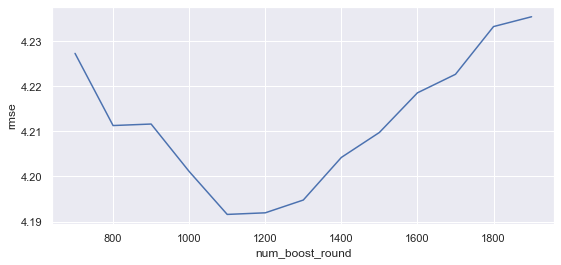

In [38]:
plt.figure(figsize=(9,4))
plt.plot(k_range, test_rmse)
plt.xlabel('num_boost_round')
plt.ylabel('rmse')
plt.show()

# __BANKA KAMPANYASI__

In [41]:
bk = pd.read_csv('bank_clean.csv')

In [42]:
bk.head(3)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_management,job_retired,job_self-employed,job_services,job_student,job_unemployed,marital_married,education_basic.school,education_high.school,education_professional.course,education_university.degree,housing_yes,loan_yes,customer_yes,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,4,1,0,0,1.100,94.000,-36.000,5.000,5191.000,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,4,1,0,0,1.100,94.000,-36.000,5.000,5191.000,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,2,1,0,0,1.100,94.000,-36.000,5.000,5191.000,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [43]:
Y = bk['y_yes']
X = bk.drop(['y_yes'], axis=1)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

standardscaler = StandardScaler()
x_train = standardscaler.fit_transform(x_train)
x_test = standardscaler.transform(x_test)

In [46]:
d_train = lgb.Dataset(x_train, label = y_train)
params = {'boosting_type' : 'gbdt',
          'objective' : 'binary',
          'metric' : 'binary_logloss',
          'sub_feature' : 0.5,
          'num_leaves' :  10,
          'min_data' : 50,
          'max_depth' : 10}

In [60]:
lgb_model = lgb.train(params, d_train, num_boost_round = 300)
y_pred = lgb_model.predict(x_test)
y_pred = [0 if pred < 0.5 else 1 for pred in y_pred]

In [61]:
accuracy_score(y_pred, y_test)

0.9101237061348144

In [58]:
k_range = np.arange(100, 500, 20)
test_score = np.empty(len(k_range))

for i, k in enumerate(k_range):
    lgb_model = lgb.train(params, d_train, num_boost_round = k)
    y_pred = lgb_model.predict(x_test)
    y_pred = [0 if pred < 0.5 else 1 for pred in y_pred]
    test_score[i] = accuracy_score(y_pred, y_test)

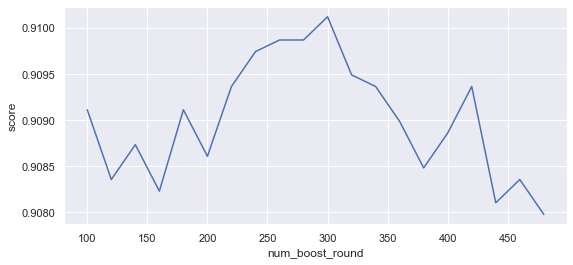

In [59]:
plt.figure(figsize=(9,4))
plt.plot(k_range, test_score)
plt.xlabel('num_boost_round')
plt.ylabel('score')
plt.show()

### Karşılaştırmlar

In [63]:
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [70]:
def modelFrame(X, Y, idx):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
    
    standardscaler = StandardScaler()
    x_train = standardscaler.fit_transform(x_train)
    x_test = standardscaler.transform(x_test)
    
    model = lgb.train(params, d_train, num_boost_round = k)

    y_pred = model.predict(x_test)
    y_pred = [0 if pred < 0.5 else 1 for pred in y_pred]

    df = pd.Series({'accuracy': accuracy_score(y_test,y_pred),
                    'precision' :precision_score(y_test,y_pred),
                    'recall': recall_score(y_test,y_pred),
                    'f1-score': f1_score(y_test,y_pred)}, name = idx)
    return df

In [71]:
dfModel = pd.DataFrame(columns = ['cross-val', 'accuracy', 'precision', 'recall', 'f1-score', 'auc-roc'])

Y = bk['y_yes']
X = bk.drop(['y_yes'], axis=1)
dfModel = dfModel.append(modelFrame(X, Y, 'lightgbm'))

x_smote, y_smote = SMOTE(random_state = 42).fit_sample(X, Y)
dfModel = dfModel.append(modelFrame(x_smote, y_smote, 'smote'))

dfModel

,cross-val,accuracy,precision,recall,f1-score,auc-roc
lightgbm,nan,0.908,0.684,0.280,0.397,nan
smote,nan,0.602,0.951,0.215,0.351,nan
